# **Import required libraries**

In [1]:
from keras import Sequential
from keras.datasets import mnist
import numpy as np
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# **Load data**

In [2]:
(train_images,train_labels),(test_images, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
print(type(train_images))
print(train_images.shape)
print(train_images[251].shape)

<class 'numpy.ndarray'>
(60000, 28, 28)
(28, 28)


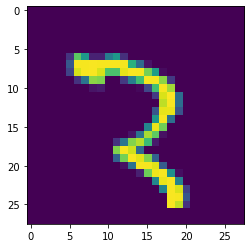

In [4]:
plt.imshow(train_images[500])

# **process the data**

1. convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature

In [5]:
dimData = np.prod(train_images.shape[1:])
print(dimData)
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)
print(train_data.shape)

784
(60000, 784)


# **Convert data to float and scale values between 0 and 1**

In [6]:
print(train_data.dtype)
train_data = train_data.astype('float')
test_data = test_data.astype('float')
print(train_data.dtype)



uint8
float64


# **scale data**

In [7]:
print("max = ", np.amax(train_data))
print("min = ", np.amin(train_data))
train_data /=255.0
test_data /=255.0
print("max = ", np.amax(train_data))
print("min = ", np.amin(train_data))

max =  255.0
min =  0.0
max =  1.0
min =  0.0


In [8]:
print(train_labels[:20])

[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9]


# **change the labels from integer to one-hot encoding**

In [9]:
train_labels_one_hot = to_categorical(train_labels)

test_labels_one_hot = to_categorical(test_labels)



print(test_labels[0])
print(train_labels_one_hot[0])





7
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


# **creating network**

In [10]:
# Build model
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(dimData,)))   #Input layer
model.add(Dense(32, activation='relu'))                           #hidden layer
model.add(Dense(10, activation='softmax'))                        #output layer


model.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                12560     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 13,434
Trainable params: 13,434
Non-trainable params: 0
_________________________________________________________________


In [11]:
# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# **Fit model**

In [12]:
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1)

Epoch 1/10
235/235 [==============================] - 1s 3ms/step - loss: 0.7934 - accuracy: 0.7728
Epoch 2/10
235/235 [==============================] - 1s 3ms/step - loss: 0.3024 - accuracy: 0.9123
Epoch 3/10
235/235 [==============================] - 1s 3ms/step - loss: 0.2544 - accuracy: 0.9274
Epoch 4/10
235/235 [==============================] - 1s 3ms/step - loss: 0.2283 - accuracy: 0.9342
Epoch 5/10
235/235 [==============================] - 1s 3ms/step - loss: 0.2073 - accuracy: 0.9396
Epoch 6/10
235/235 [==============================] - 1s 3ms/step - loss: 0.1908 - accuracy: 0.9446
Epoch 7/10
235/235 [==============================] - 1s 3ms/step - loss: 0.1777 - accuracy: 0.9483
Epoch 8/10
235/235 [==============================] - 1s 3ms/step - loss: 0.1672 - accuracy: 0.9514
Epoch 9/10
235/235 [==============================] - 1s 3ms/step - loss: 0.1587 - accuracy: 0.9539
Epoch 10/10
235/235 [==============================] - 1s 3ms/step - loss: 0.1515 - accuracy: 0.9559

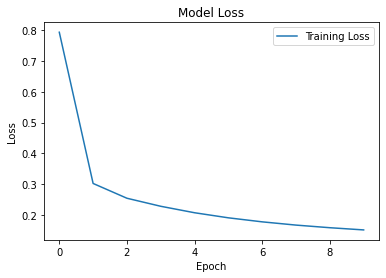

In [13]:
# Plot accuracy , loss plot
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss'], loc='upper right')
plt.show()



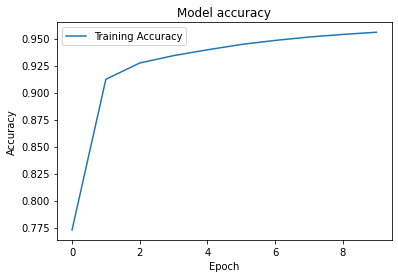

In [14]:
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy'], loc='upper left')
plt.show()

# **Task1:** 

1.Change the number of hidden layers and the activation to tanh or sigmoid 

  First I am changing to **tanh** and also added 2 hidden layers of Dense.

  **Findings:** After adding more layers of dense and changing activation   function to tanh accuracy increased from 95% to 98%

In [15]:
model_2 = Sequential()
model_2.add(Dense(64, activation='relu', input_shape=(dimData,))) # input layer
model_2.add(Dense(128, activation='tanh'))                        # hidden layer
model_2.add(Dense(256, activation='tanh'))                        # hidden layer
model_2.add(Dense(10, activation='softmax'))                      # output layer


model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_4 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_5 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                2570      
Total params: 94,154
Trainable params: 94,154
Non-trainable params: 0
_________________________________________________________________


In [16]:
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
history = model_2.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1)

Epoch 1/10
235/235 [==============================] - 2s 6ms/step - loss: 0.3792 - accuracy: 0.8896
Epoch 2/10
235/235 [==============================] - 1s 6ms/step - loss: 0.1426 - accuracy: 0.9568
Epoch 3/10
235/235 [==============================] - 1s 6ms/step - loss: 0.1043 - accuracy: 0.9686
Epoch 4/10
235/235 [==============================] - 2s 7ms/step - loss: 0.0807 - accuracy: 0.9747
Epoch 5/10
235/235 [==============================] - 1s 6ms/step - loss: 0.0646 - accuracy: 0.9799
Epoch 6/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0545 - accuracy: 0.9826
Epoch 7/10
235/235 [==============================] - 1s 6ms/step - loss: 0.0461 - accuracy: 0.9848
Epoch 8/10
235/235 [==============================] - 1s 6ms/step - loss: 0.0366 - accuracy: 0.9883
Epoch 9/10
235/235 [==============================] - 1s 6ms/step - loss: 0.0326 - accuracy: 0.9897
Epoch 10/10
235/235 [==============================] - 2s 6ms/step - loss: 0.0274 - accuracy: 0.9912

1.Change the number of hidden layers and the activation to tanh or sigmoid 

Here, I am changing to **sigmoid** and also added 2 hidden layers of Dense.

**Findings** After changing activation function from tanh to sigmoid there is slight decrease in accuracy. We got good accuracy for tanh function than sigmoid.

In [18]:
model_3 = Sequential()
model_3.add(Dense(64, activation='relu', input_shape=(dimData,)))   # input layer
model_3.add(Dense(128, activation='sigmoid'))                       # hidden layer
model_3.add(Dense(256, activation='sigmoid'))                       # hidden layer
model_3.add(Dense(10, activation='softmax'))                        # Output layer  


model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_8 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_9 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_10 (Dense)             (None, 10)                2570      
Total params: 94,154
Trainable params: 94,154
Non-trainable params: 0
_________________________________________________________________


In [19]:
model_3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
history = model_3.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                    validation_data=(test_data, test_labels_one_hot))

[test_loss, test_acc] = model_3.evaluate(test_data, test_labels_one_hot)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

Epoch 1/10
235/235 [==============================] - 2s 7ms/step - loss: 0.8594 - accuracy: 0.7574 - val_loss: 0.2968 - val_accuracy: 0.9145
Epoch 2/10
235/235 [==============================] - 2s 6ms/step - loss: 0.2511 - accuracy: 0.9265 - val_loss: 0.2069 - val_accuracy: 0.9382
Epoch 3/10
235/235 [==============================] - 2s 7ms/step - loss: 0.1819 - accuracy: 0.9456 - val_loss: 0.1625 - val_accuracy: 0.9518
Epoch 4/10
235/235 [==============================] - 1s 6ms/step - loss: 0.1457 - accuracy: 0.9564 - val_loss: 0.1393 - val_accuracy: 0.9592
Epoch 5/10
235/235 [==============================] - 1s 6ms/step - loss: 0.1226 - accuracy: 0.9631 - val_loss: 0.1292 - val_accuracy: 0.9617
Epoch 6/10
235/235 [==============================] - 1s 6ms/step - loss: 0.1054 - accuracy: 0.9680 - val_loss: 0.1216 - val_accuracy: 0.9634
Epoch 7/10
235/235 [==============================] - 2s 7ms/step - loss: 0.0931 - accuracy: 0.9715 - val_loss: 0.1076 - val_accuracy: 0.9676
Epoch 

# **Task 2**

2. Using the history object in the source code, plot the loss and accuracy for both training data and validation data on the same graph.

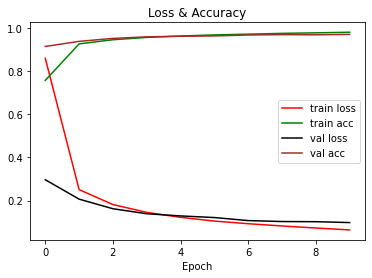

In [21]:
plt.plot(history.history['loss'], color="red")
plt.plot(history.history['accuracy'], color="green")
plt.plot(history.history['val_loss'], color="black")
plt.plot(history.history['val_accuracy'], color="brown")
plt.title('Loss & Accuracy')
plt.xlabel('Epoch')
plt.legend(['train loss', 'train acc', 'val loss', 'val acc'], loc='center right')
plt.show()

# **Task3**

Run the same code without scaling the images

**Findings:** From the above we see that accuracy decreases if we train the model without scaling the data. Accuracy decreased from 98% to 96%

784
Epoch 1/10
235/235 [==============================] - 2s 7ms/step - loss: 0.6712 - accuracy: 0.8258 - val_loss: 0.2457 - val_accuracy: 0.9290
Epoch 2/10
235/235 [==============================] - 2s 7ms/step - loss: 0.2151 - accuracy: 0.9369 - val_loss: 0.1896 - val_accuracy: 0.9429
Epoch 3/10
235/235 [==============================] - 2s 7ms/step - loss: 0.1734 - accuracy: 0.9477 - val_loss: 0.1774 - val_accuracy: 0.9486
Epoch 4/10
235/235 [==============================] - 1s 6ms/step - loss: 0.1494 - accuracy: 0.9559 - val_loss: 0.1471 - val_accuracy: 0.9560
Epoch 5/10
235/235 [==============================] - 1s 6ms/step - loss: 0.1363 - accuracy: 0.9598 - val_loss: 0.1535 - val_accuracy: 0.9522
Epoch 6/10
235/235 [==============================] - 1s 6ms/step - loss: 0.1255 - accuracy: 0.9626 - val_loss: 0.1426 - val_accuracy: 0.9567
Epoch 7/10
235/235 [==============================] - 2s 7ms/step - loss: 0.1185 - accuracy: 0.9643 - val_loss: 0.1325 - val_accuracy: 0.9597
Ep

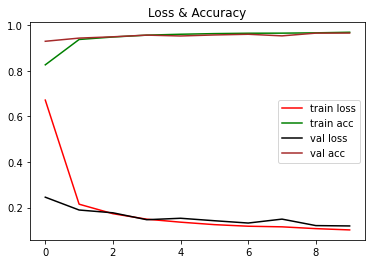

In [22]:
#load the data
(train_images,train_labels),(test_images, test_labels) = mnist.load_data()

#convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature
dimData = np.prod(train_images.shape[1:])
print(dimData)
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)

#convert data to float and scale values between 0 and 1
train_data = train_data.astype('float')
test_data = test_data.astype('float')

#change the labels from integer to one-hot encoding 
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

#Build model

model_4 = Sequential()
model_4.add(Dense(64, activation='relu', input_shape=(dimData,)))
model_4.add(Dense(128, activation='sigmoid'))
model_4.add(Dense(256, activation='sigmoid'))
model_4.add(Dense(10, activation='softmax'))

#Compile model 

model_4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit model 
history = model_4.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                    validation_data=(test_data, test_labels_one_hot))

# Evaluate the result on test data
[test_loss, test_acc] = model_4.evaluate(test_data, test_labels_one_hot)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

# plot train and test accuracy, loss plot
plt.plot(history.history['loss'], color="red")
plt.plot(history.history['accuracy'], color="green")
plt.plot(history.history['val_loss'], color="black")
plt.plot(history.history['val_accuracy'], color="brown")
plt.title('Loss & Accuracy')
plt.legend(['train loss', 'train acc', 'val loss', 'val acc'], loc='center right')
plt.show()

# **Task4**

 Convert the sequential model to a functional API model.

In [23]:
from keras.layers import Input, Reshape, Concatenate
from keras.layers import Dense, Flatten
from keras.models import Model

(x_train_full, y_train_full), (x_test, y_test) = mnist.load_data()

X_valid, X_train = x_train_full[:5000] / 255.0, x_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

input_ = Input(shape=[28, 28])
flatten = Flatten(input_shape=[28, 28])(input_)
hidden1 = Dense(28, activation="relu")(flatten)
hidden2 = Dense(512, activation='relu')(hidden1)
hidden3 = Dense(28*28, activation='relu')(hidden2)
reshap = Reshape((28, 28))(hidden3)
concat_ = Concatenate()([input_, reshap])
flatten2 = Flatten(input_shape=[28, 28])(concat_)
output = Dense(10, activation='softmax')(flatten2)
model_func = Model(inputs=[input_], outputs=[output] )

In [24]:
model_func.compile(loss="sparse_categorical_crossentropy", optimizer="sgd",
              metrics=["accuracy"])
h = model_func.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.7697 - accuracy: 0.8249 - val_loss: 0.4564 - val_accuracy: 0.8876
Epoch 2/10
1719/1719 [==============================] - 11s 7ms/step - loss: 0.4173 - accuracy: 0.8877 - val_loss: 0.3470 - val_accuracy: 0.9056
Epoch 3/10
1719/1719 [==============================] - 11s 7ms/step - loss: 0.3438 - accuracy: 0.9028 - val_loss: 0.2969 - val_accuracy: 0.9170
Epoch 4/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.3005 - accuracy: 0.9140 - val_loss: 0.2631 - val_accuracy: 0.9284
Epoch 5/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.2704 - accuracy: 0.9223 - val_loss: 0.2388 - val_accuracy: 0.9322
Epoch 6/10
1719/1719 [==============================] - 11s 7ms/step - loss: 0.2466 - accuracy: 0.9293 - val_loss: 0.2202 - val_accuracy: 0.9396
Epoch 7/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.2260 - accuracy: 0.9345 - val_loss: 0.1999 - val_ac

In [25]:
[test_loss, test_acc] = model_func.evaluate(X_valid, y_valid)
print("API Model Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

157/157 [==============================] - 0s 3ms/step - loss: 0.1632 - accuracy: 0.9548
API Model Evaluation result on Test Data : Loss = 0.16319726407527924, accuracy = 0.954800009727478


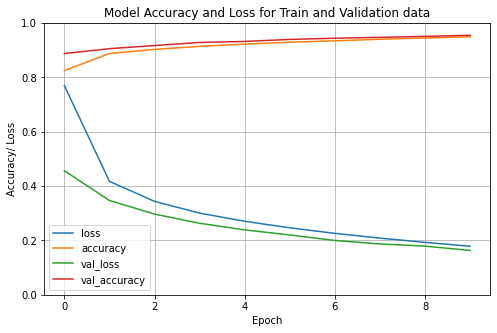

In [26]:
import pandas as pd

pd.DataFrame(h.history).plot(figsize=(8, 5))
plt.grid(True)
plt.title('Model Accuracy and Loss for Train and Validation data')
plt.ylabel('Accuracy/ Loss')
plt.xlabel('Epoch')
plt.gca().set_ylim(0, 1) 
plt.show()

# **Task5**

5. Plot one of the images in the test data, and then do inferencing to check what is the prediction of the model on that single image in the test data.

The prediction for the 6 image in the test dataset is: [[2.89343260e-09 1.72769585e-08 9.11787623e-08 8.74303652e-09
  9.96019304e-01 5.08724760e-08 1.44727110e-08 1.15324966e-07
  6.29246875e-04 3.35115730e-03]]


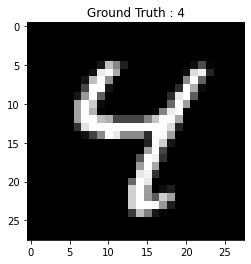

In [33]:
# Loading and predicting the image using the test data
random_index = np.random.randint(100)                                                                          # It takes random index ranging from 1 to 100
predict_test = model_2.predict(test_data[[random_index], :])
print("The prediction for the {} image in the test dataset is: {}".format(random_index, predict_test))

# plot image and its prediction by model
plt.imshow(test_images[random_index, :, :],cmap='gray')
plt.title('Ground Truth : {}'.format(test_labels[random_index]))
plt.show()



# **Task6**

Change the loss method to (sparce categorical_crossentropy)


**Encountered error in this case because we did change labels from integer to one-hot encoding but SparseCategoricalCrossentropy expects labels to be provided as integers so to change from categorical_crossentropy to SparseCategoricalCrossentropy no need to do one-hot encoding.**

In [28]:
# load data
(train_images,train_labels),(test_images, test_labels) = mnist.load_data()

# print shape
print(type(train_images))
print(train_images.shape)
print(train_images[251].shape)

# convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature

dimData = np.prod(train_images.shape[1:])
print(dimData)
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)
print(train_data.shape)

# Convert data to float and scale values between 0 and 1 
print(train_data.dtype)
train_data = train_data.astype('float')
test_data = test_data.astype('float')
print(train_data.dtype)

# Scale data

print("max = ", np.amax(train_data))
print("min = ", np.amin(train_data))
train_data /=255.0
test_data /=255.0
print("max = ", np.amax(train_data))
print("min = ", np.amin(train_data))







<class 'numpy.ndarray'>
(60000, 28, 28)
(28, 28)
784
(60000, 784)
uint8
float64
max =  255.0
min =  0.0
max =  1.0
min =  0.0


In [29]:
model_5 = Sequential()
model_5.add(Dense(64, activation='relu', input_dim = dimData))      # input layer
model_5.add(Dense(128, activation='relu'))                          # hidden layer
model_5.add(Dense(10, activation='softmax'))                        # output layer


model_5.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_20 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_21 (Dense)             (None, 10)                1290      
Total params: 59,850
Trainable params: 59,850
Non-trainable params: 0
_________________________________________________________________


In [30]:
model_5.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [31]:
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1)

Epoch 1/10
235/235 [==============================] - 1s 3ms/step - loss: 0.1453 - accuracy: 0.9574
Epoch 2/10
235/235 [==============================] - 1s 3ms/step - loss: 0.1386 - accuracy: 0.9596
Epoch 3/10
235/235 [==============================] - 1s 3ms/step - loss: 0.1341 - accuracy: 0.9596
Epoch 4/10
235/235 [==============================] - 1s 3ms/step - loss: 0.1299 - accuracy: 0.9606
Epoch 5/10
235/235 [==============================] - 1s 3ms/step - loss: 0.1252 - accuracy: 0.9625
Epoch 6/10
235/235 [==============================] - 1s 3ms/step - loss: 0.1214 - accuracy: 0.9640
Epoch 7/10
235/235 [==============================] - 1s 3ms/step - loss: 0.1179 - accuracy: 0.9646
Epoch 8/10
235/235 [==============================] - 1s 3ms/step - loss: 0.1147 - accuracy: 0.9661
Epoch 9/10
235/235 [==============================] - 1s 3ms/step - loss: 0.1114 - accuracy: 0.9672
Epoch 10/10
235/235 [==============================] - 1s 3ms/step - loss: 0.1087 - accuracy: 0.9676

# **Task7**

Use a method (from NumPy) to print the correct class from the model prediction.

In [32]:
# Loading and predicting the image using the test data
random_index = np.random.randint(100)
predict_test= np.argmax(model_5.predict(test_data[[random_index], :]))
predict_test = model_5.predict(test_data[[random_index], :])
print("The prediction for the {} image in the test dataset is: {}".format(random_index, predict_test))

The prediction for the 33 image in the test dataset is: [[0.09842987 0.14772248 0.10909886 0.07140186 0.08643859 0.1026496
  0.13491532 0.10592449 0.08241335 0.06100557]]
